In [233]:
# importing the packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.neighbors  import KNeighborsClassifier , KNeighborsRegressor
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix ,accuracy_score , classification_report , roc_auc_score


In [234]:
# importing data

dd = pd.read_csv(r"D:\2 . Data Science\My Studies\ML\KNN Projects\Breast Cancer Wisconsin (Diagnostic)\data.csv")

In [235]:
# checking the number of columns and rows 

print("Number of Rows : " , dd.shape[0])

print("Number of Columns : " , dd.shape[1])

Number of Rows :  569
Number of Columns :  33


In [236]:
# checking for Null Values

dd.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [237]:
# Dropping columns that are of no importance :

dd.drop(columns = ['Unnamed: 32' ,'id'], inplace= True)

<Axes: xlabel='diagnosis', ylabel='Count'>

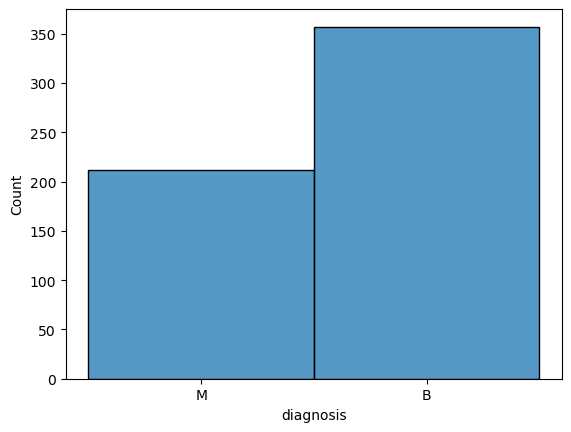

In [238]:
# Checking the Y variable distribution for imbalance :

sns.histplot(dd.diagnosis , discrete = True )

In [239]:
# checking for outliers

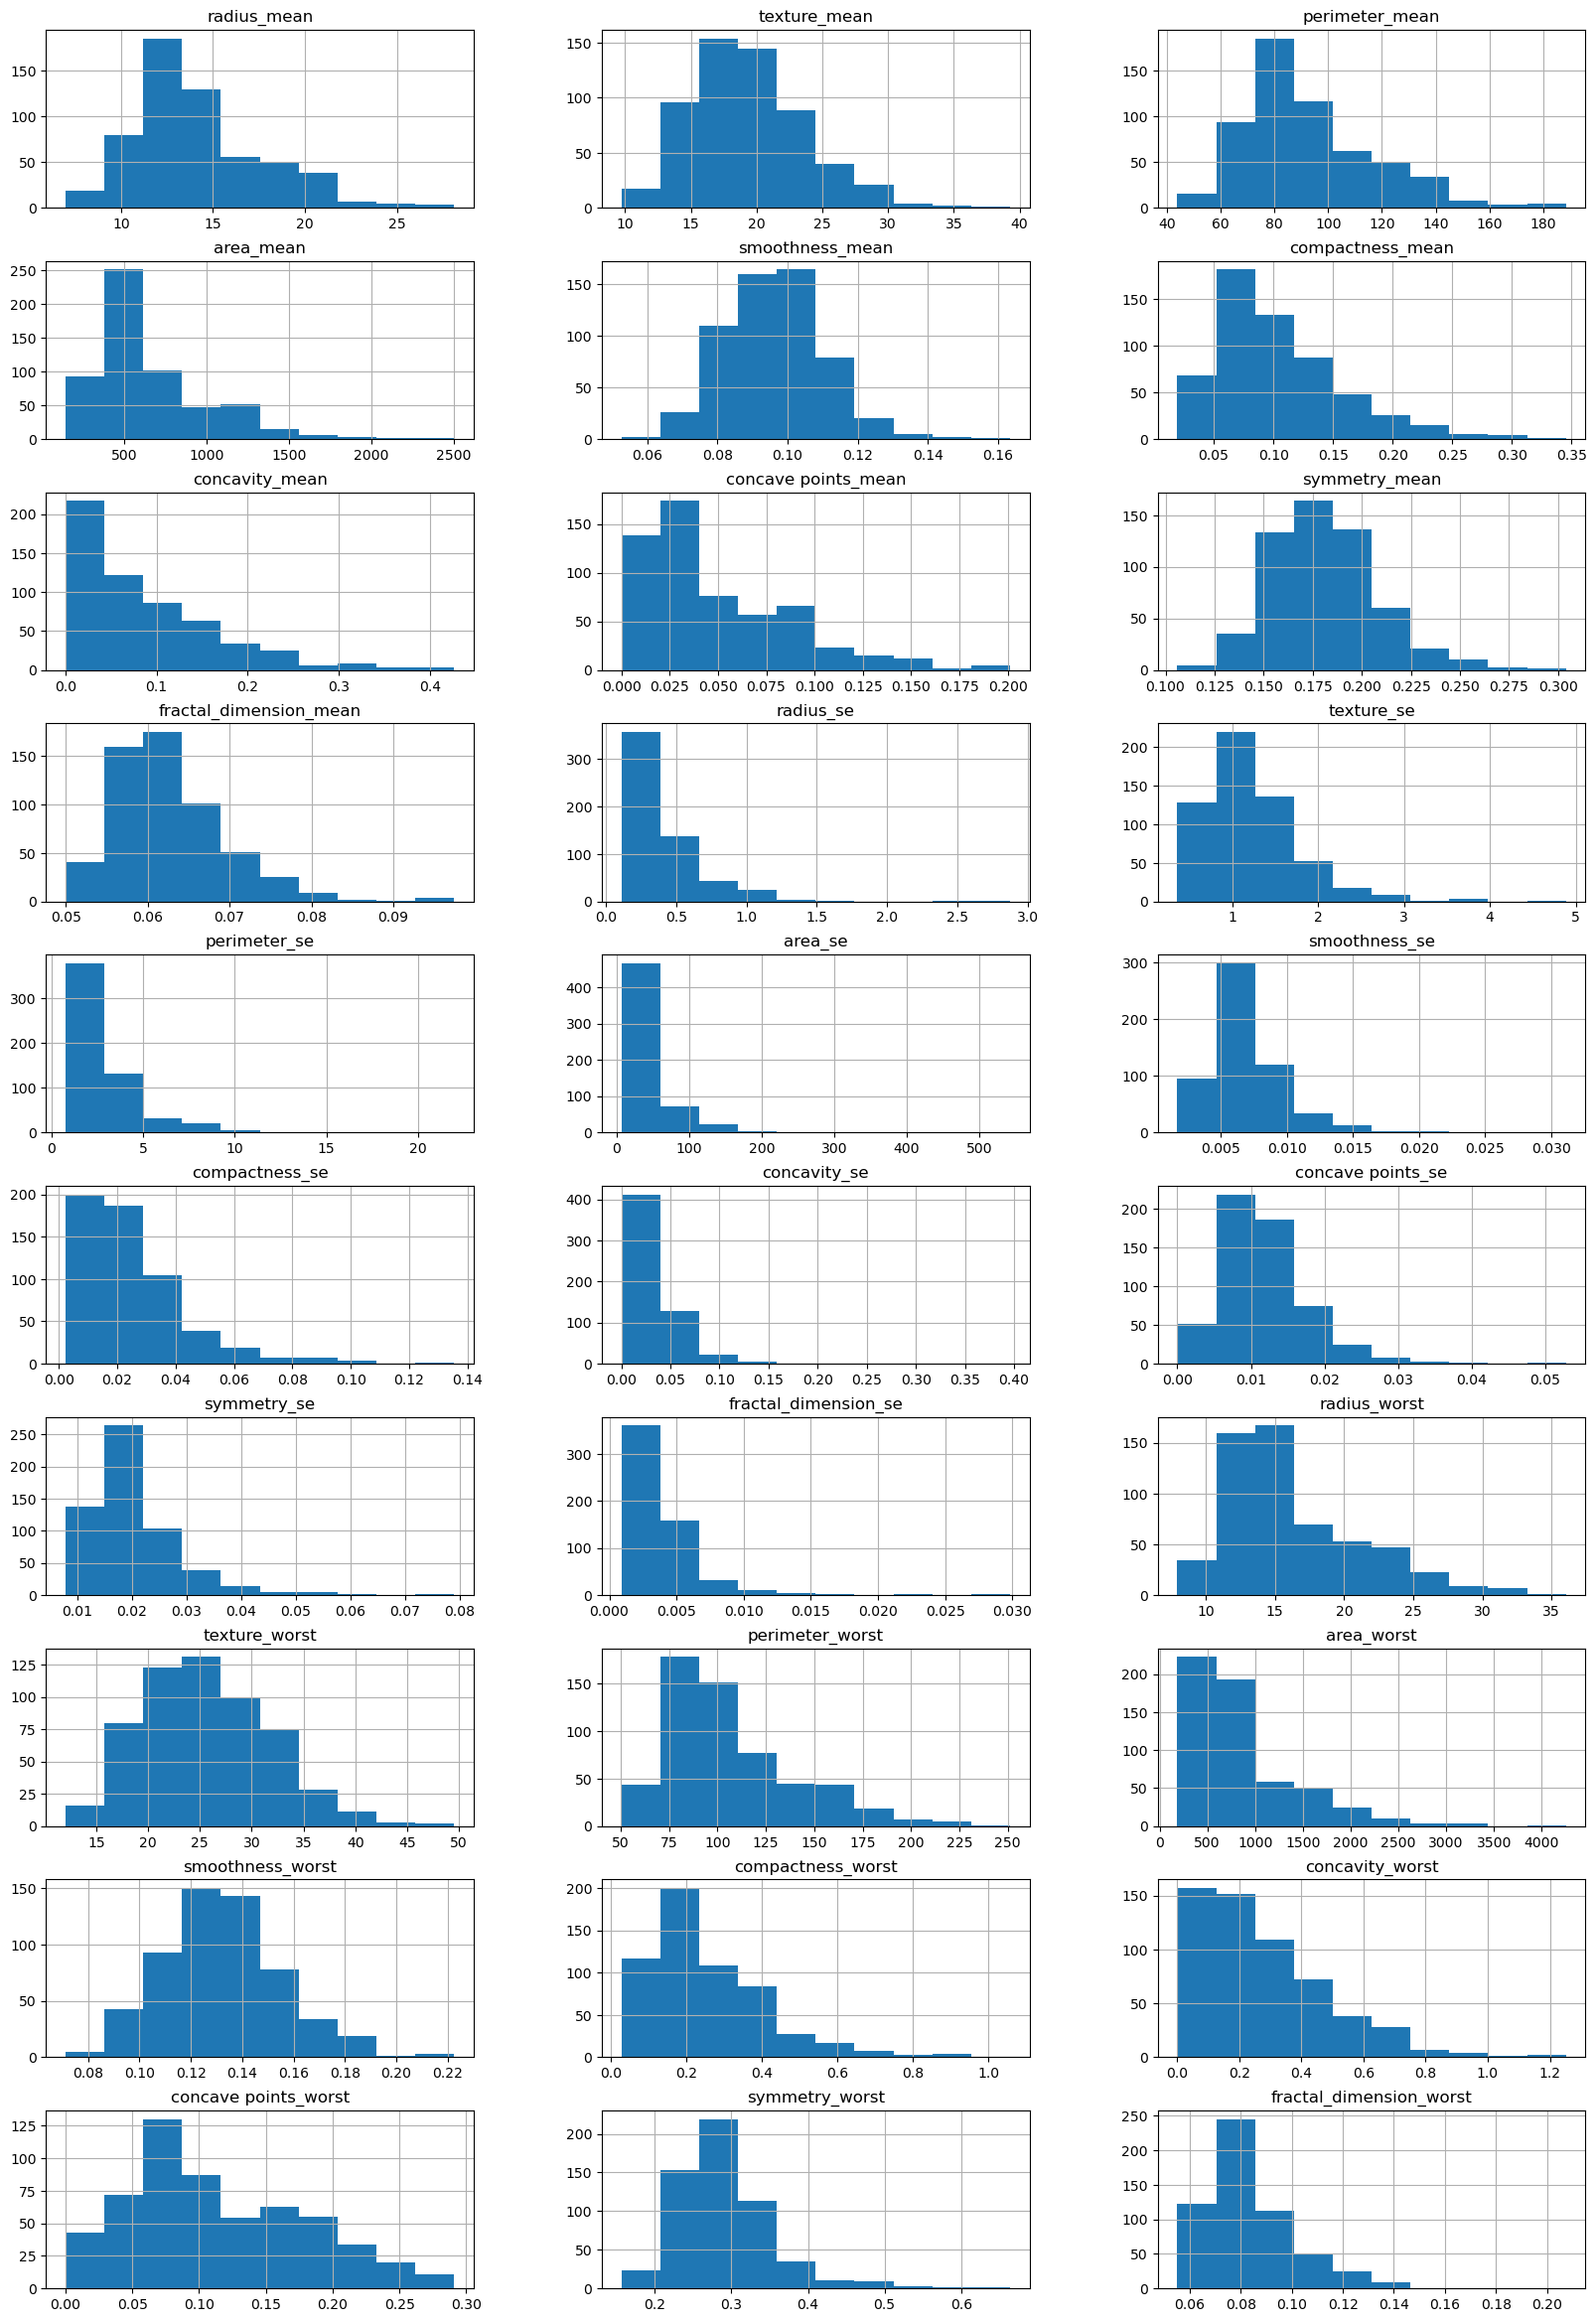

In [240]:

cols = len(dd.select_dtypes('number').columns)
dd.select_dtypes('number').hist( layout = (cols,3) , figsize = (20,3*cols))
plt.show()


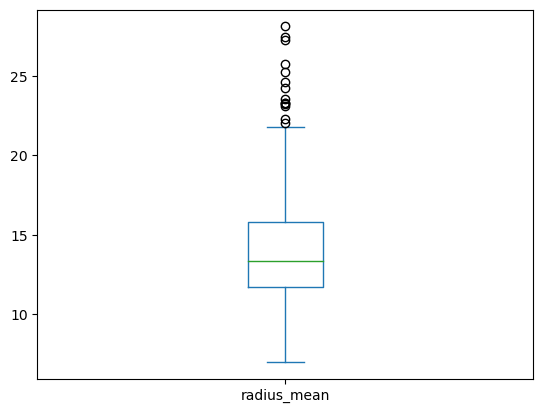

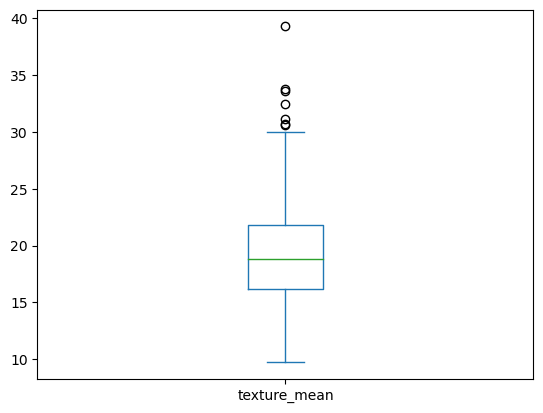

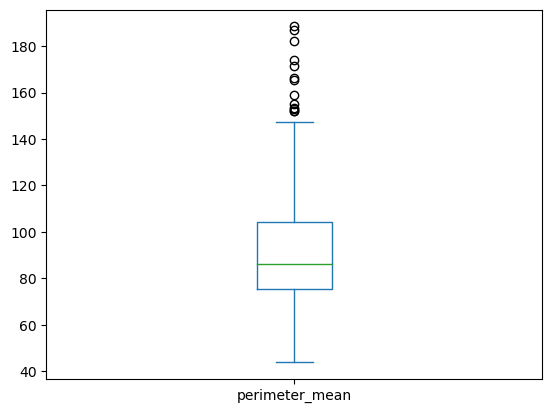

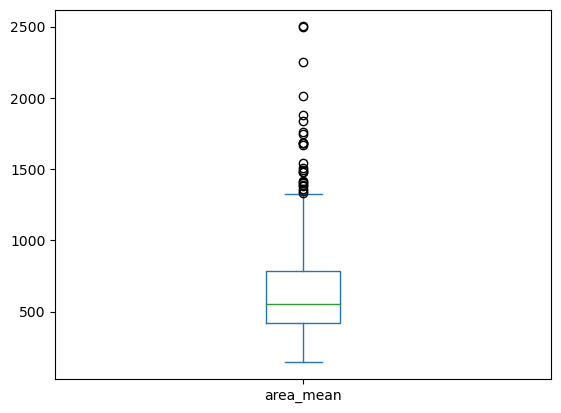

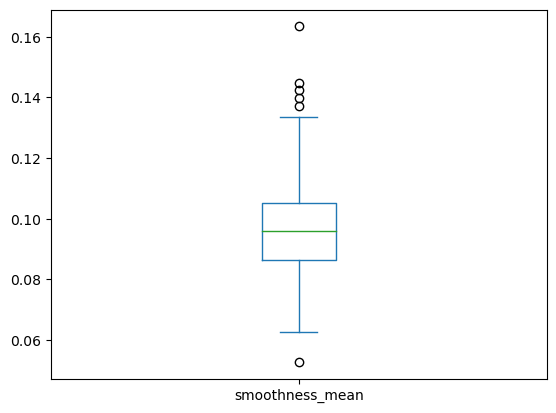

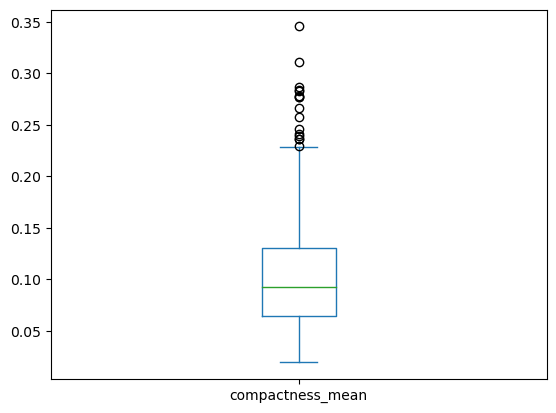

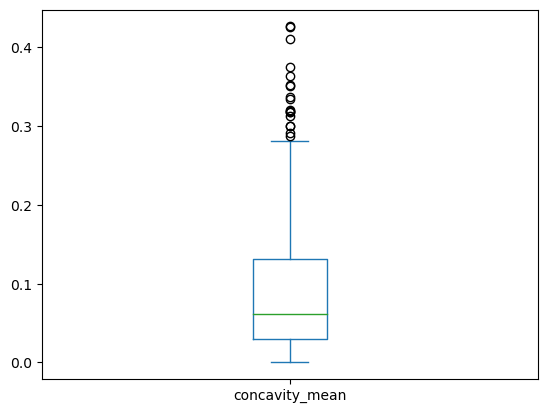

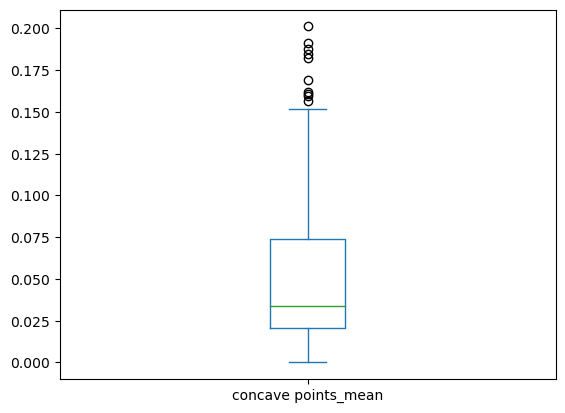

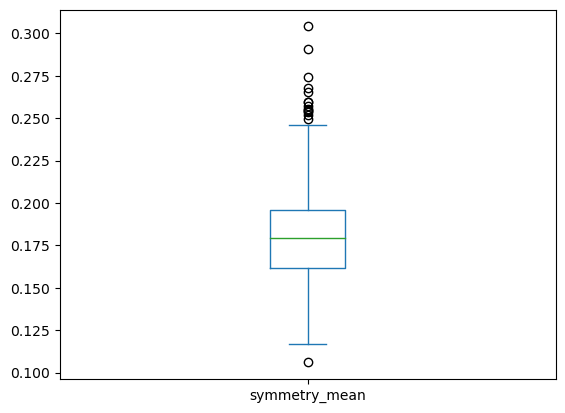

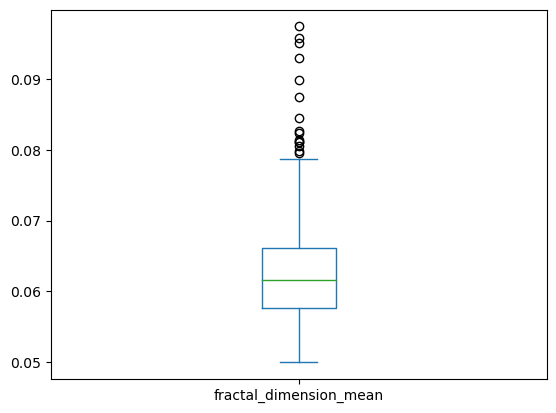

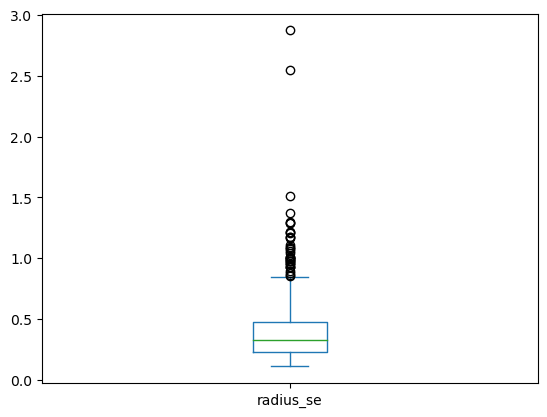

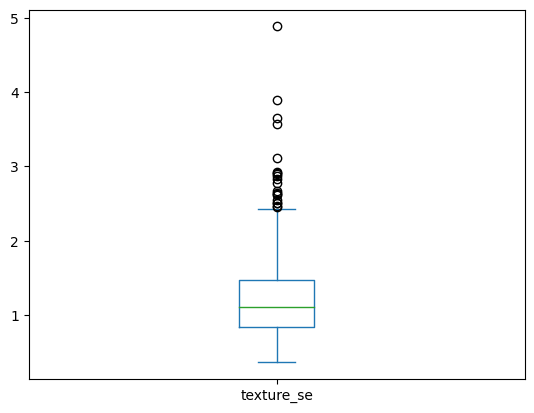

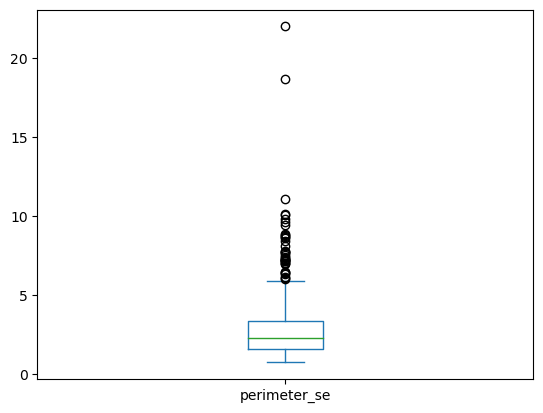

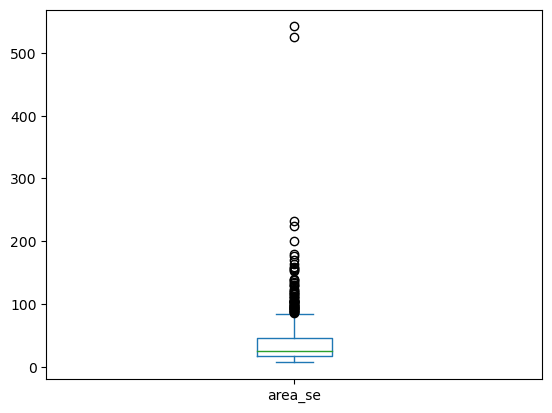

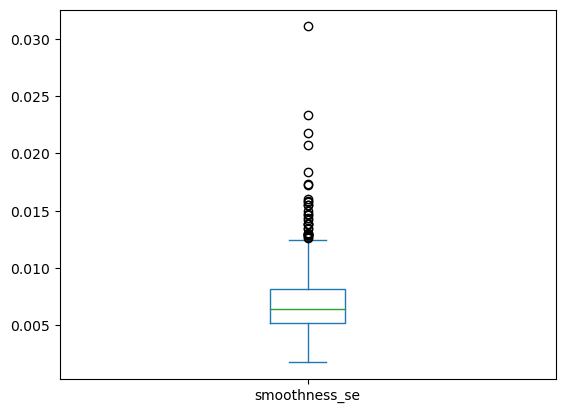

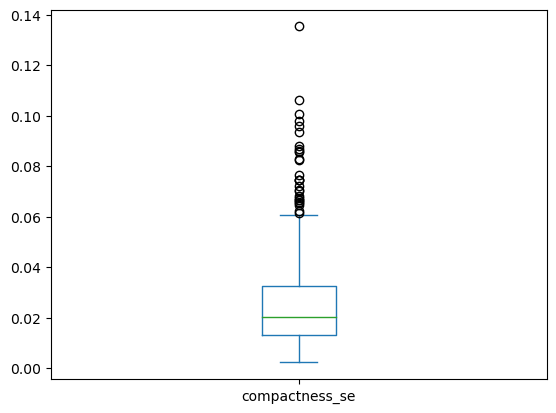

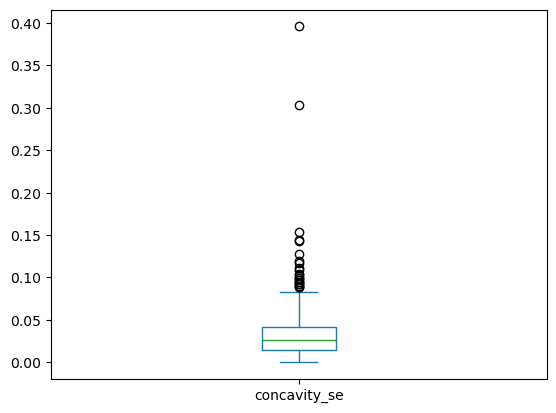

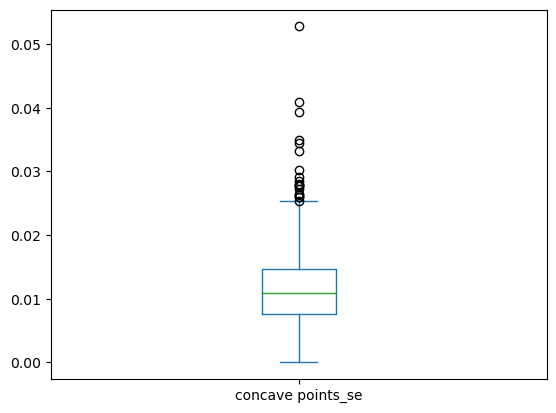

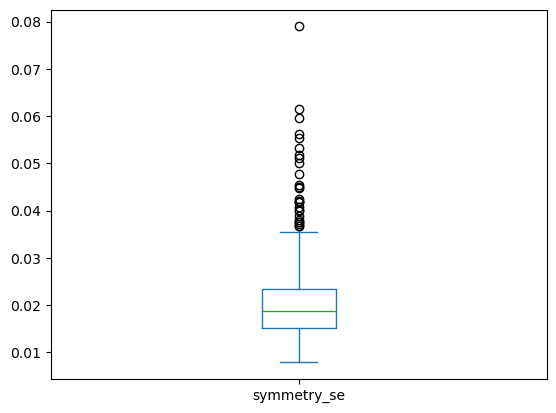

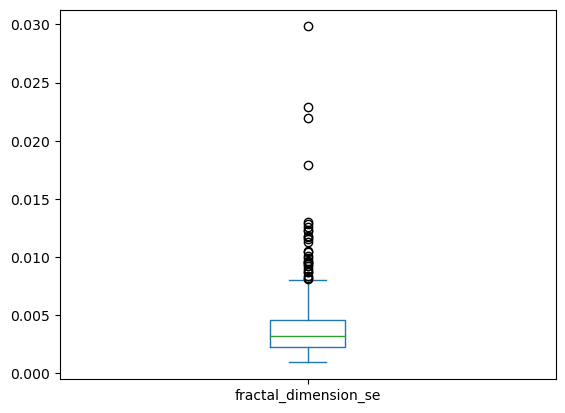

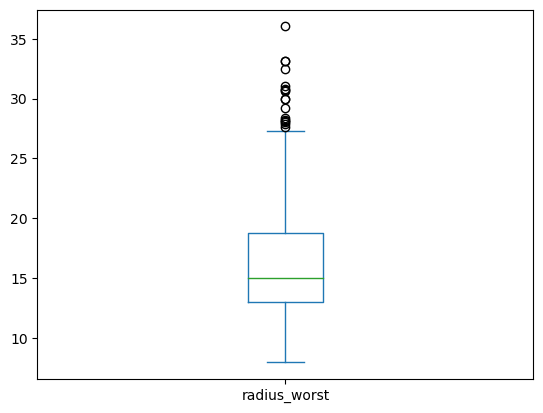

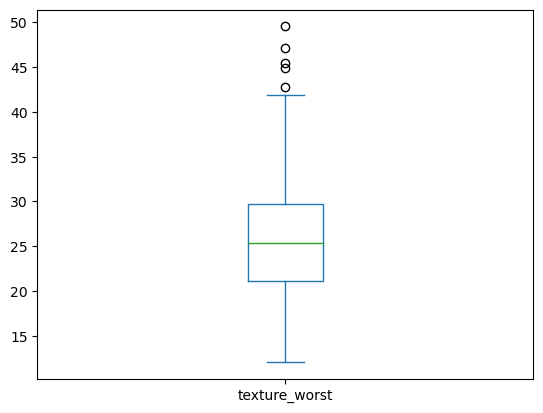

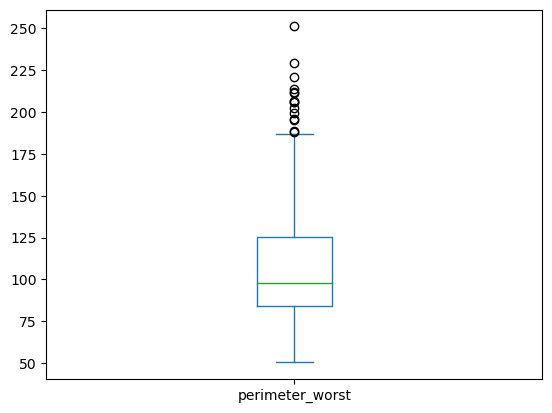

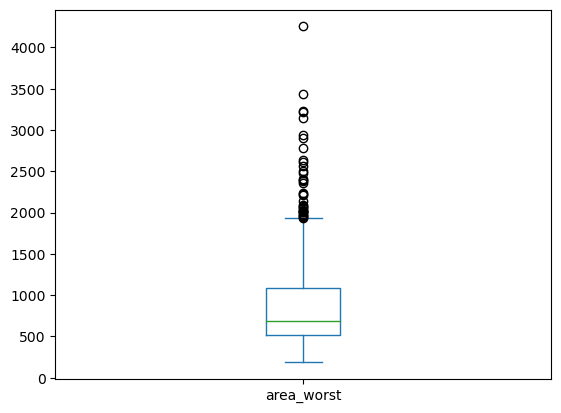

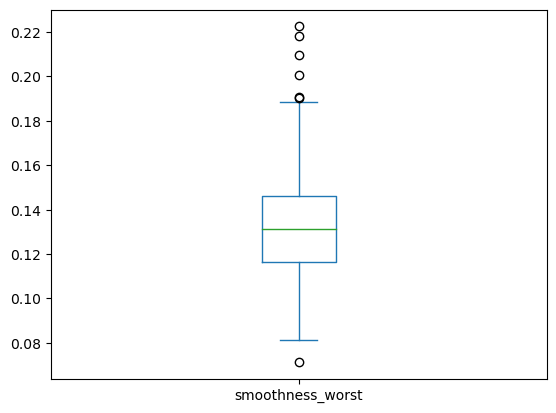

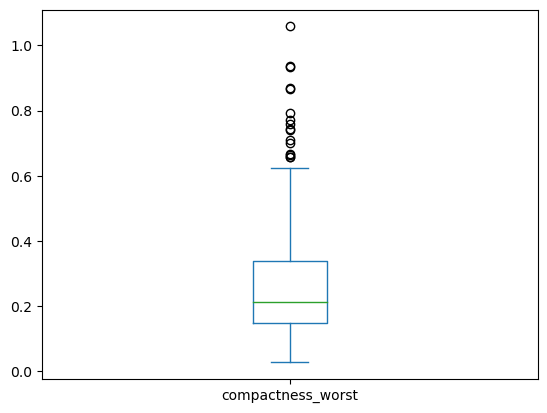

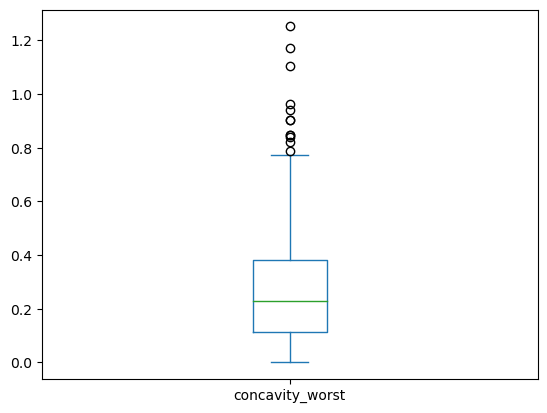

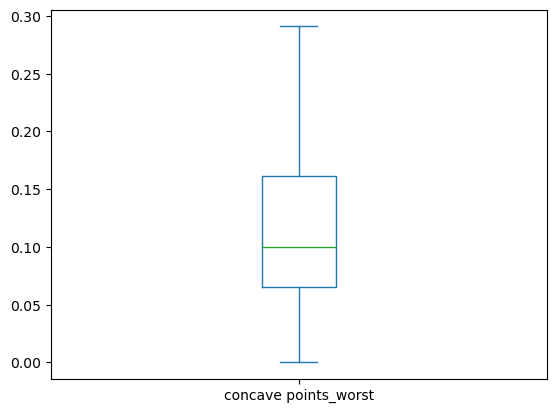

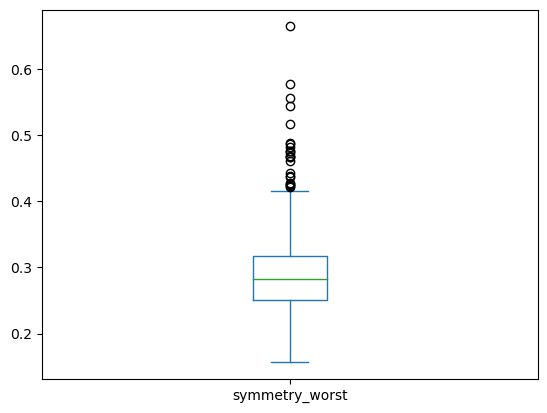

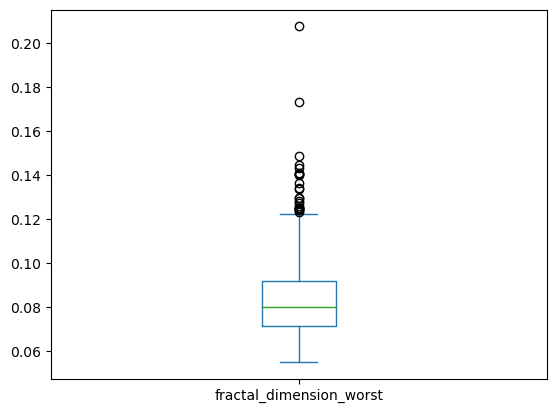

In [241]:
for m in dd.select_dtypes('number').columns:
    dd[m].plot(kind = 'box')
    plt.show()

In [242]:
train_df , test_df = train_test_split(dd , test_size= 0.2 , random_state= 123)

In [243]:
# treating outliers : 

for m in dd.select_dtypes('number').columns:
    loww = train_df[m].quantile(0.05)
    upp = train_df[m].quantile(0.95)
    train_df[m].clip(lower = loww , upper = upp , inplace=True)
    test_df[m].clip(lower = loww , upper = upp , inplace= True)

## For Feature Selection


In [244]:
# 1. checking the relationships of y variable with X Varibales  ( which varibales are having an impact on our y varible)

In [245]:
train_df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.250110,17.977423,78.776588,469.980880,0.092921,0.082141,0.047372,0.026935,0.174773,0.062735,...,13.492264,23.507655,87.822937,566.709965,0.125058,0.185987,0.167857,0.076822,0.271156,0.079648
M,17.259509,21.579942,113.657953,944.930409,0.102038,0.141579,0.154056,0.085368,0.192852,0.062813,...,20.806199,29.084269,138.624912,1356.064912,0.142983,0.354844,0.436691,0.181042,0.316445,0.089618


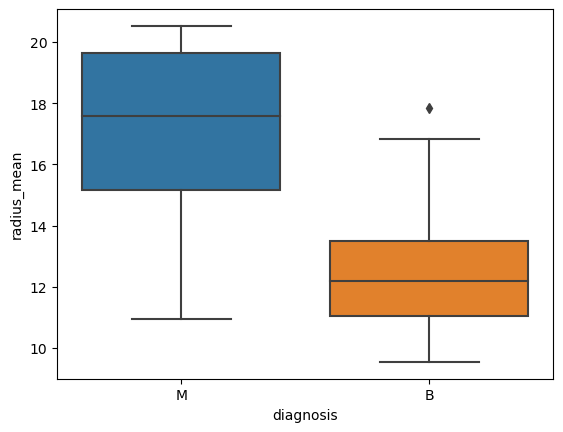

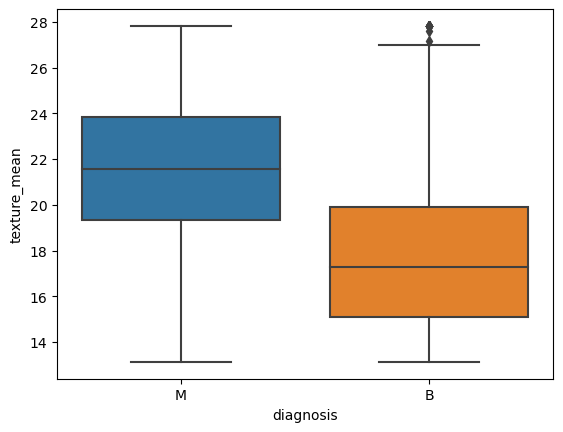

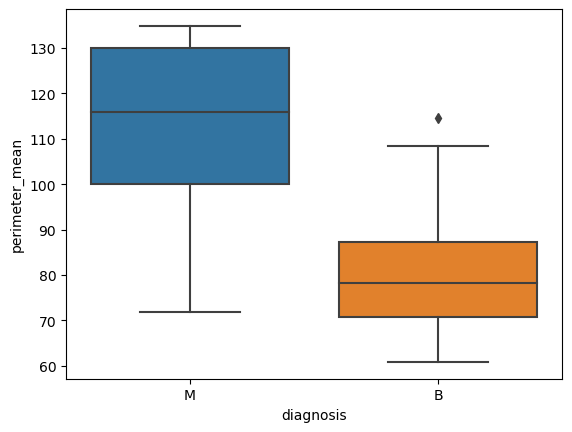

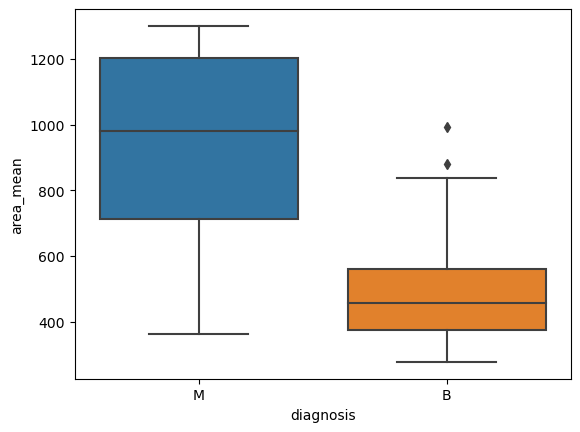

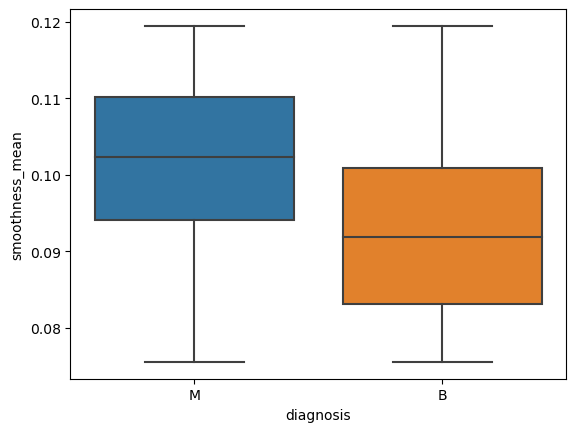

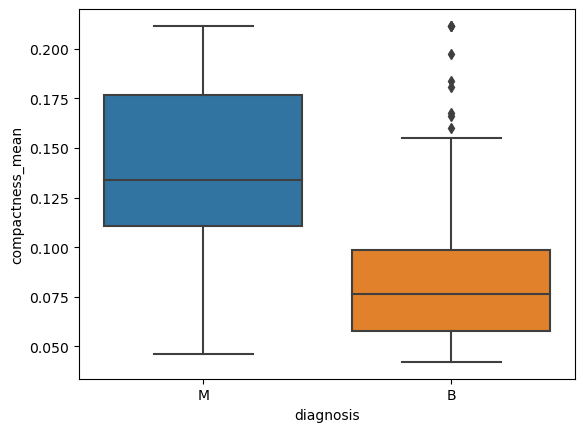

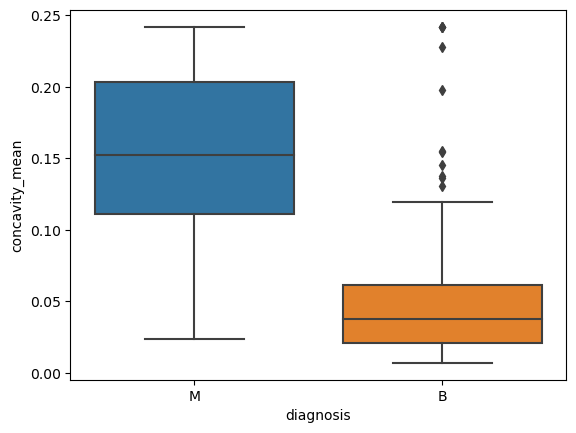

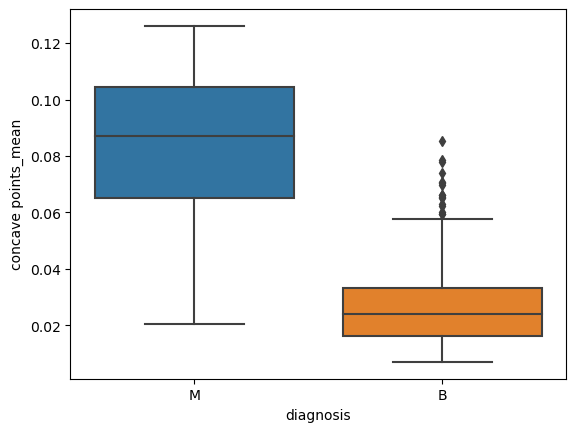

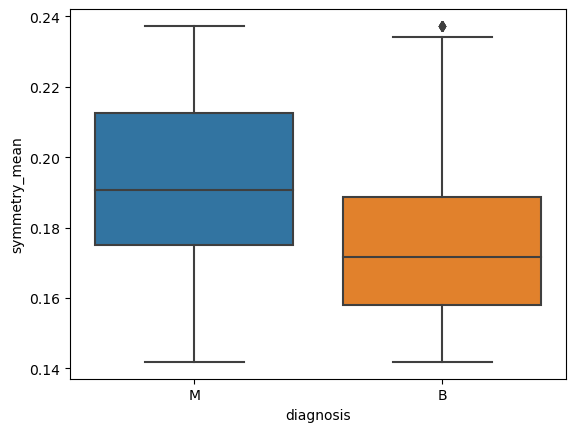

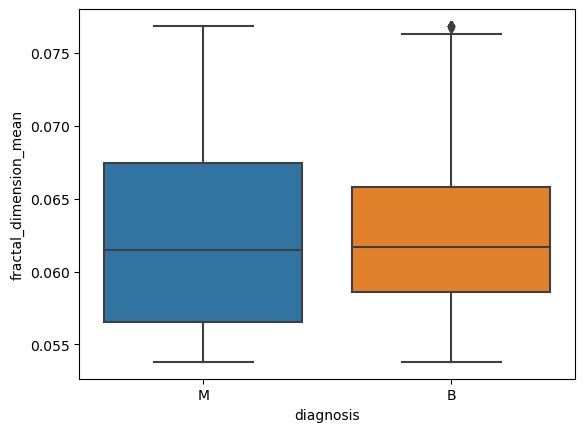

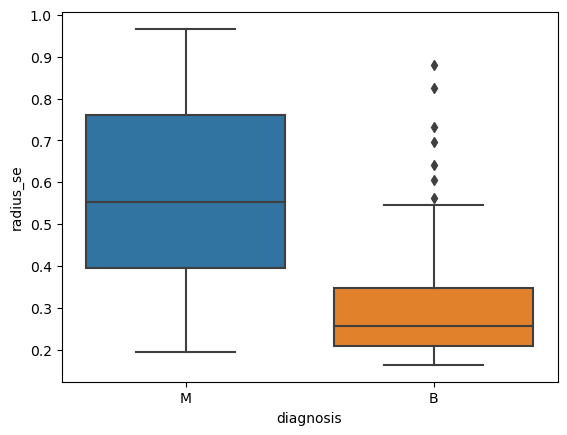

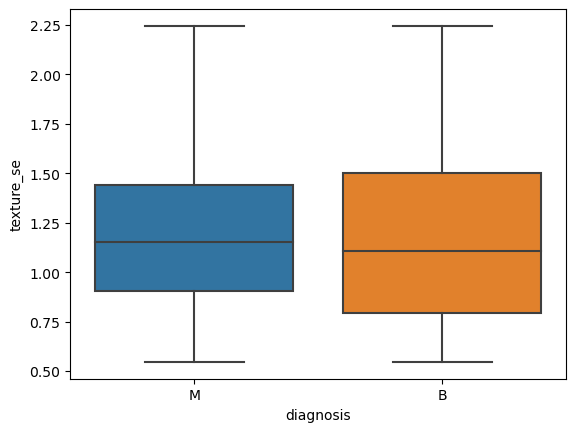

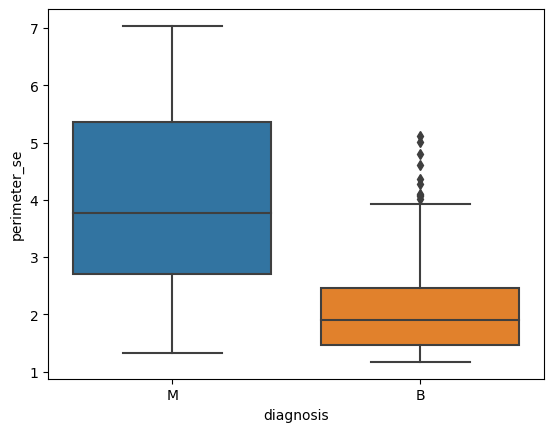

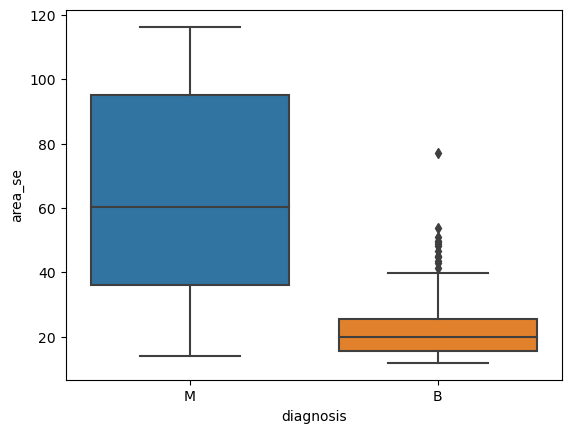

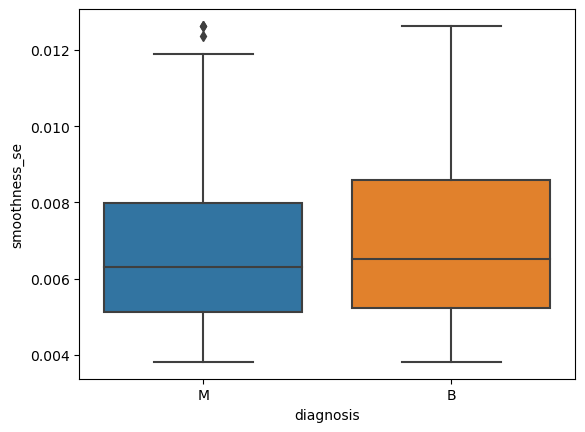

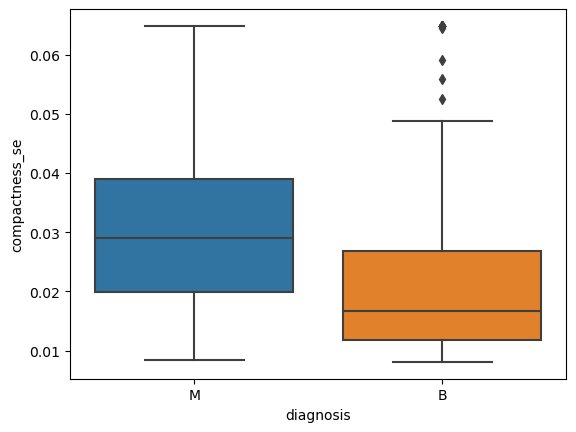

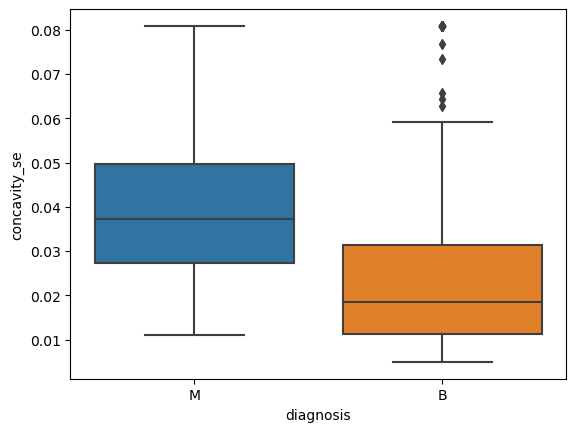

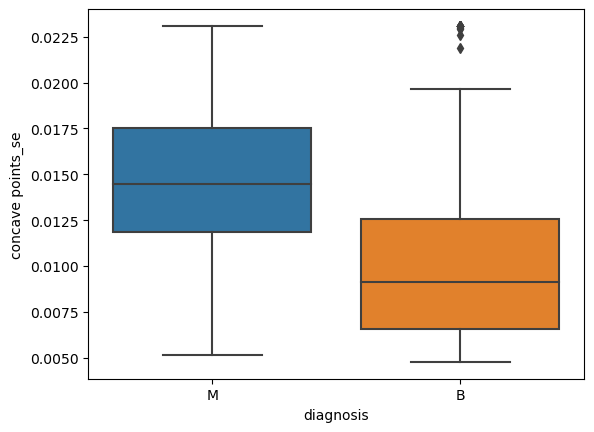

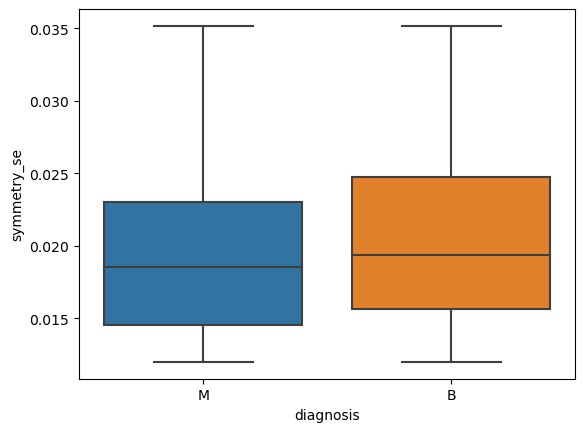

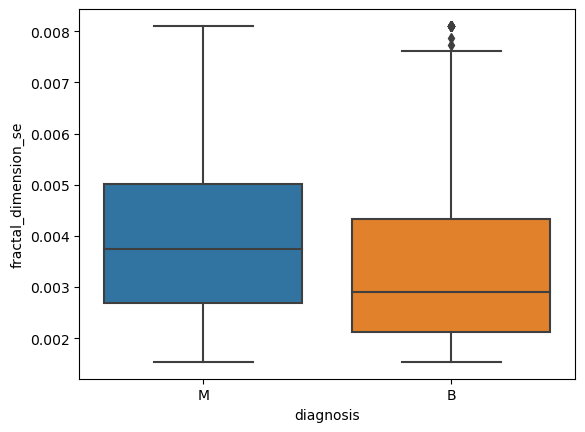

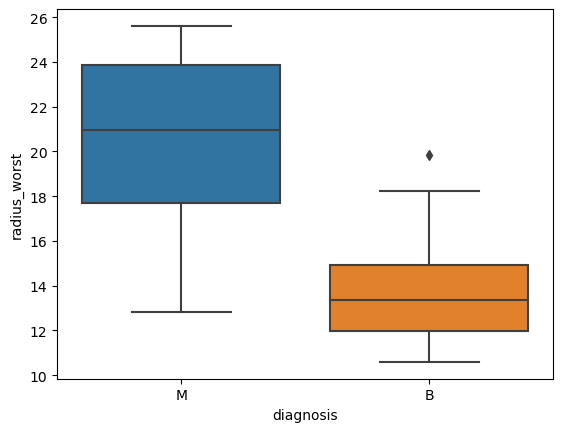

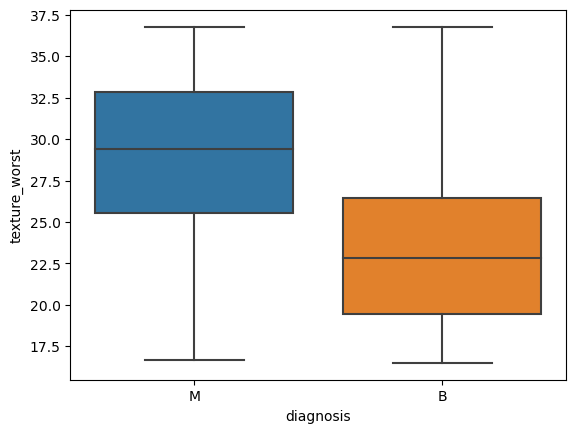

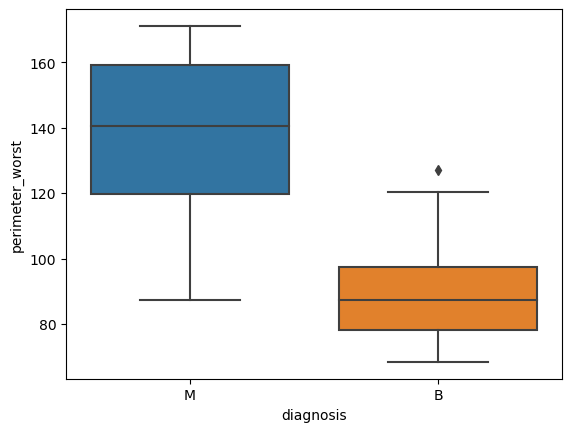

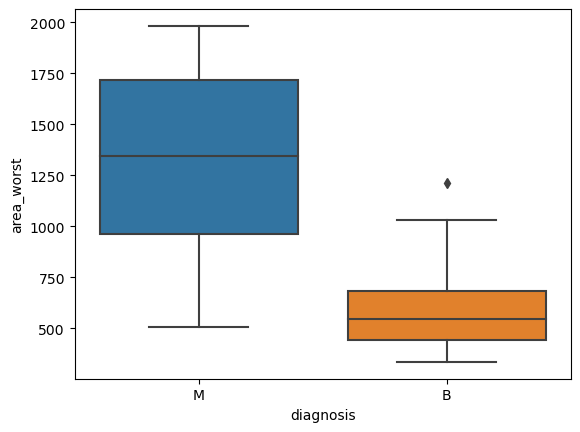

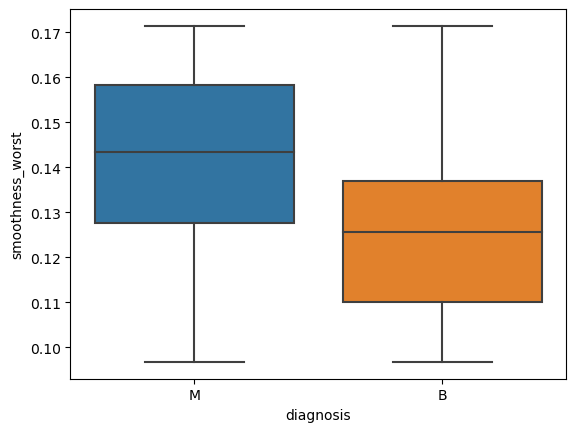

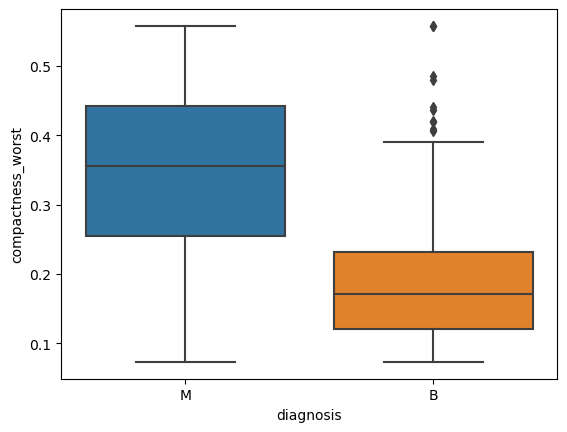

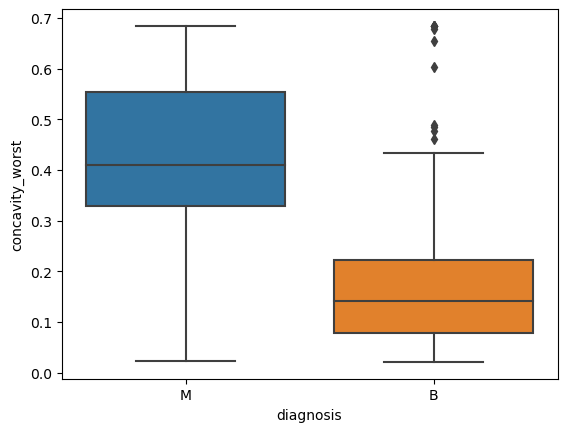

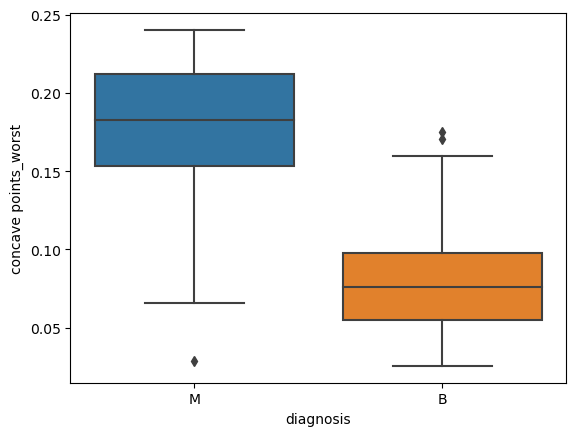

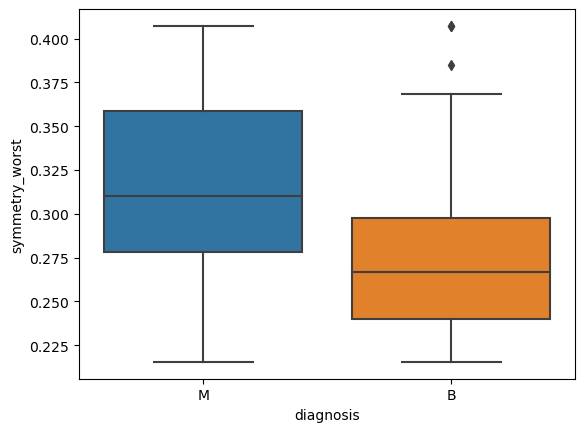

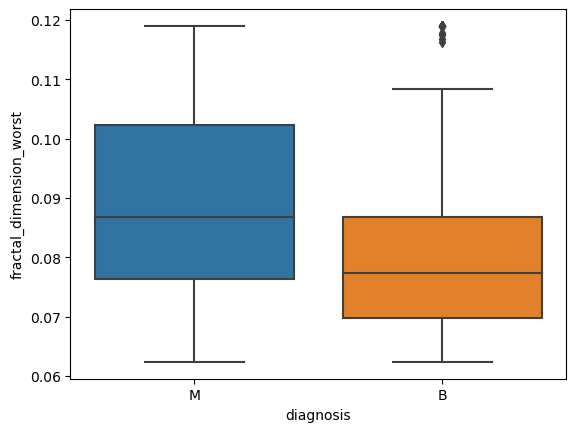

In [246]:
for m in train_df.select_dtypes('number').columns:
    sns.boxplot(y = train_df[m] , x  = train_df['diagnosis'] )
    plt.show()
    

In [247]:
features = ['radius_mean' ,'texture_mean' ,  'perimeter_mean' , 'area_mean' , 'smoothness_mean' , 'compactness_mean', 
            'concavity_mean' ,  'concave points_mean', 'symmetry_mean' , 'radius_se' , 'perimeter_se', 'area_se' , 
            'compactness_se' , 'concavity_se', 'concave points_se' , 'radius_worst', 'texture_worst', 'perimeter_worst', 
            'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',  'symmetry_worst',
            'fractal_dimension_worst']

<Axes: >

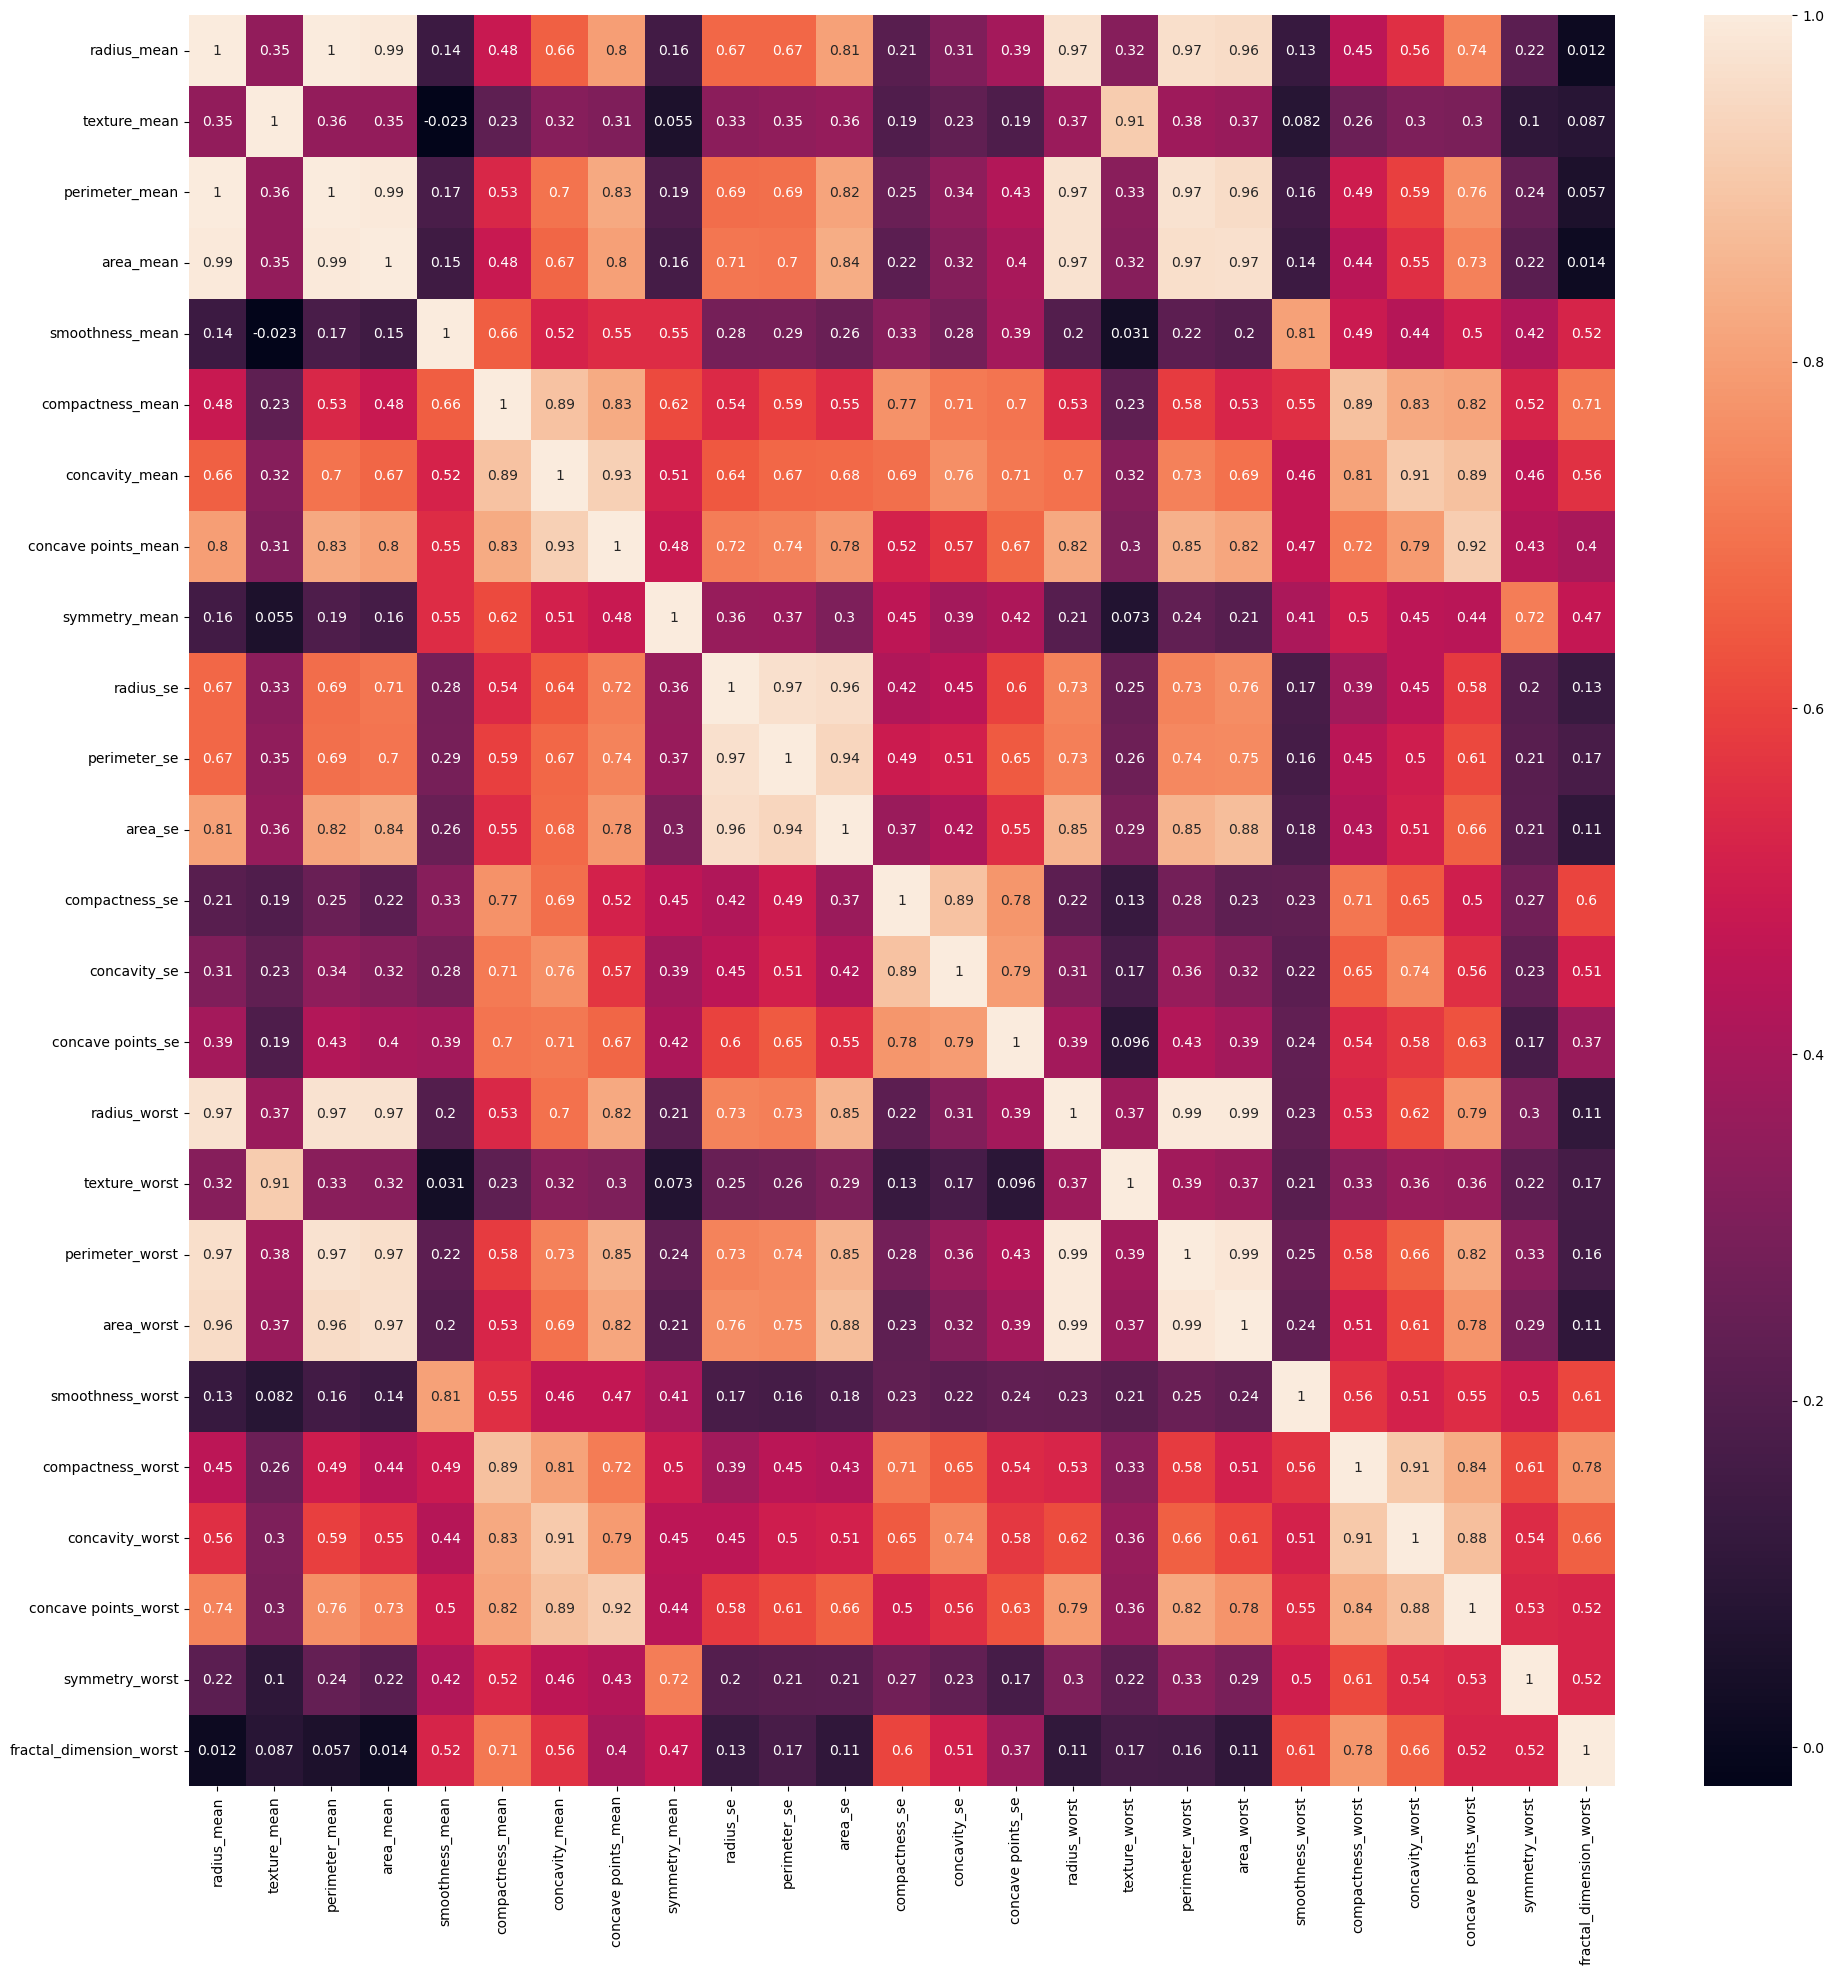

In [248]:
# checking for multicolinearity
plt.figure(figsize= (23,23))
sns.heatmap(train_df[features].corr() , annot = True)

<Axes: >

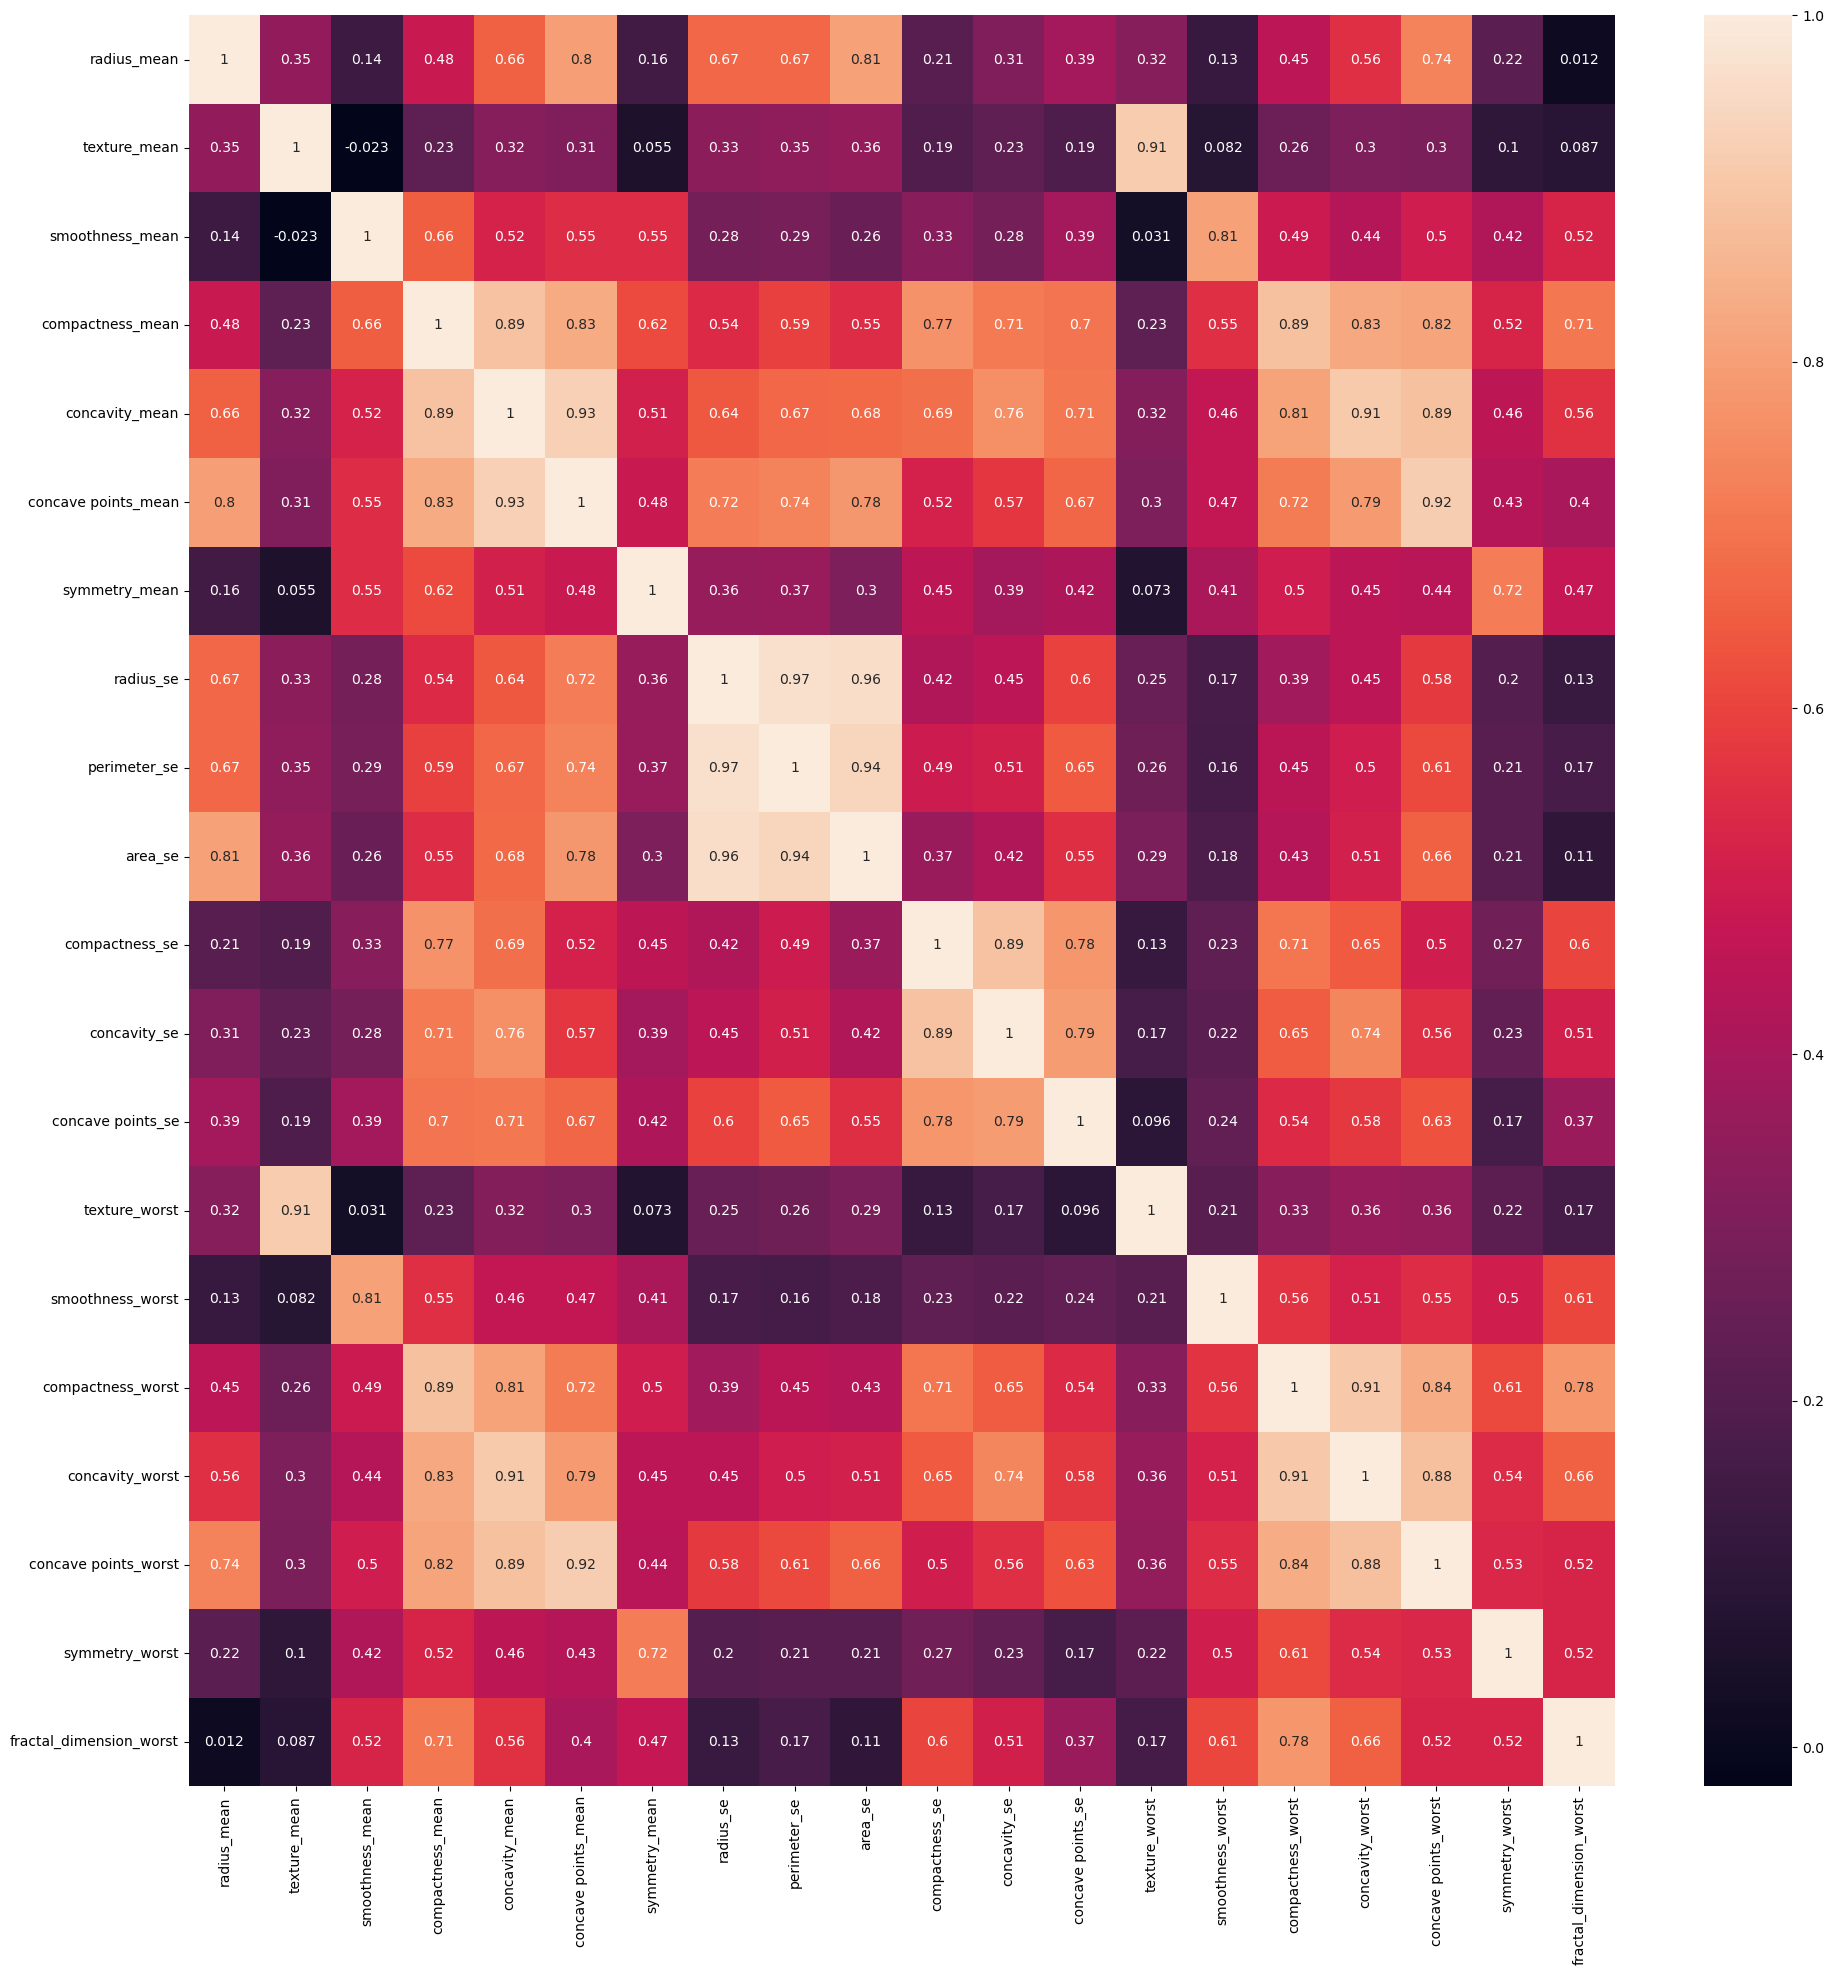

In [249]:
# getting rid of columns [ 'perimeter_mean' , 'area_mean' , 'radius_worst' , 'perimeter_worst' , 'area_worst']

features2 = ['radius_mean' ,'texture_mean' , 'smoothness_mean' , 'compactness_mean', 
            'concavity_mean' ,  'concave points_mean', 'symmetry_mean' , 'radius_se' , 'perimeter_se', 'area_se' , 
            'compactness_se' , 'concavity_se', 'concave points_se' , 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',  'symmetry_worst',
            'fractal_dimension_worst']

# again checking for multicolinearity
plt.figure(figsize= (23,23))
sns.heatmap(train_df[features2].corr() , annot = True)

<Axes: >

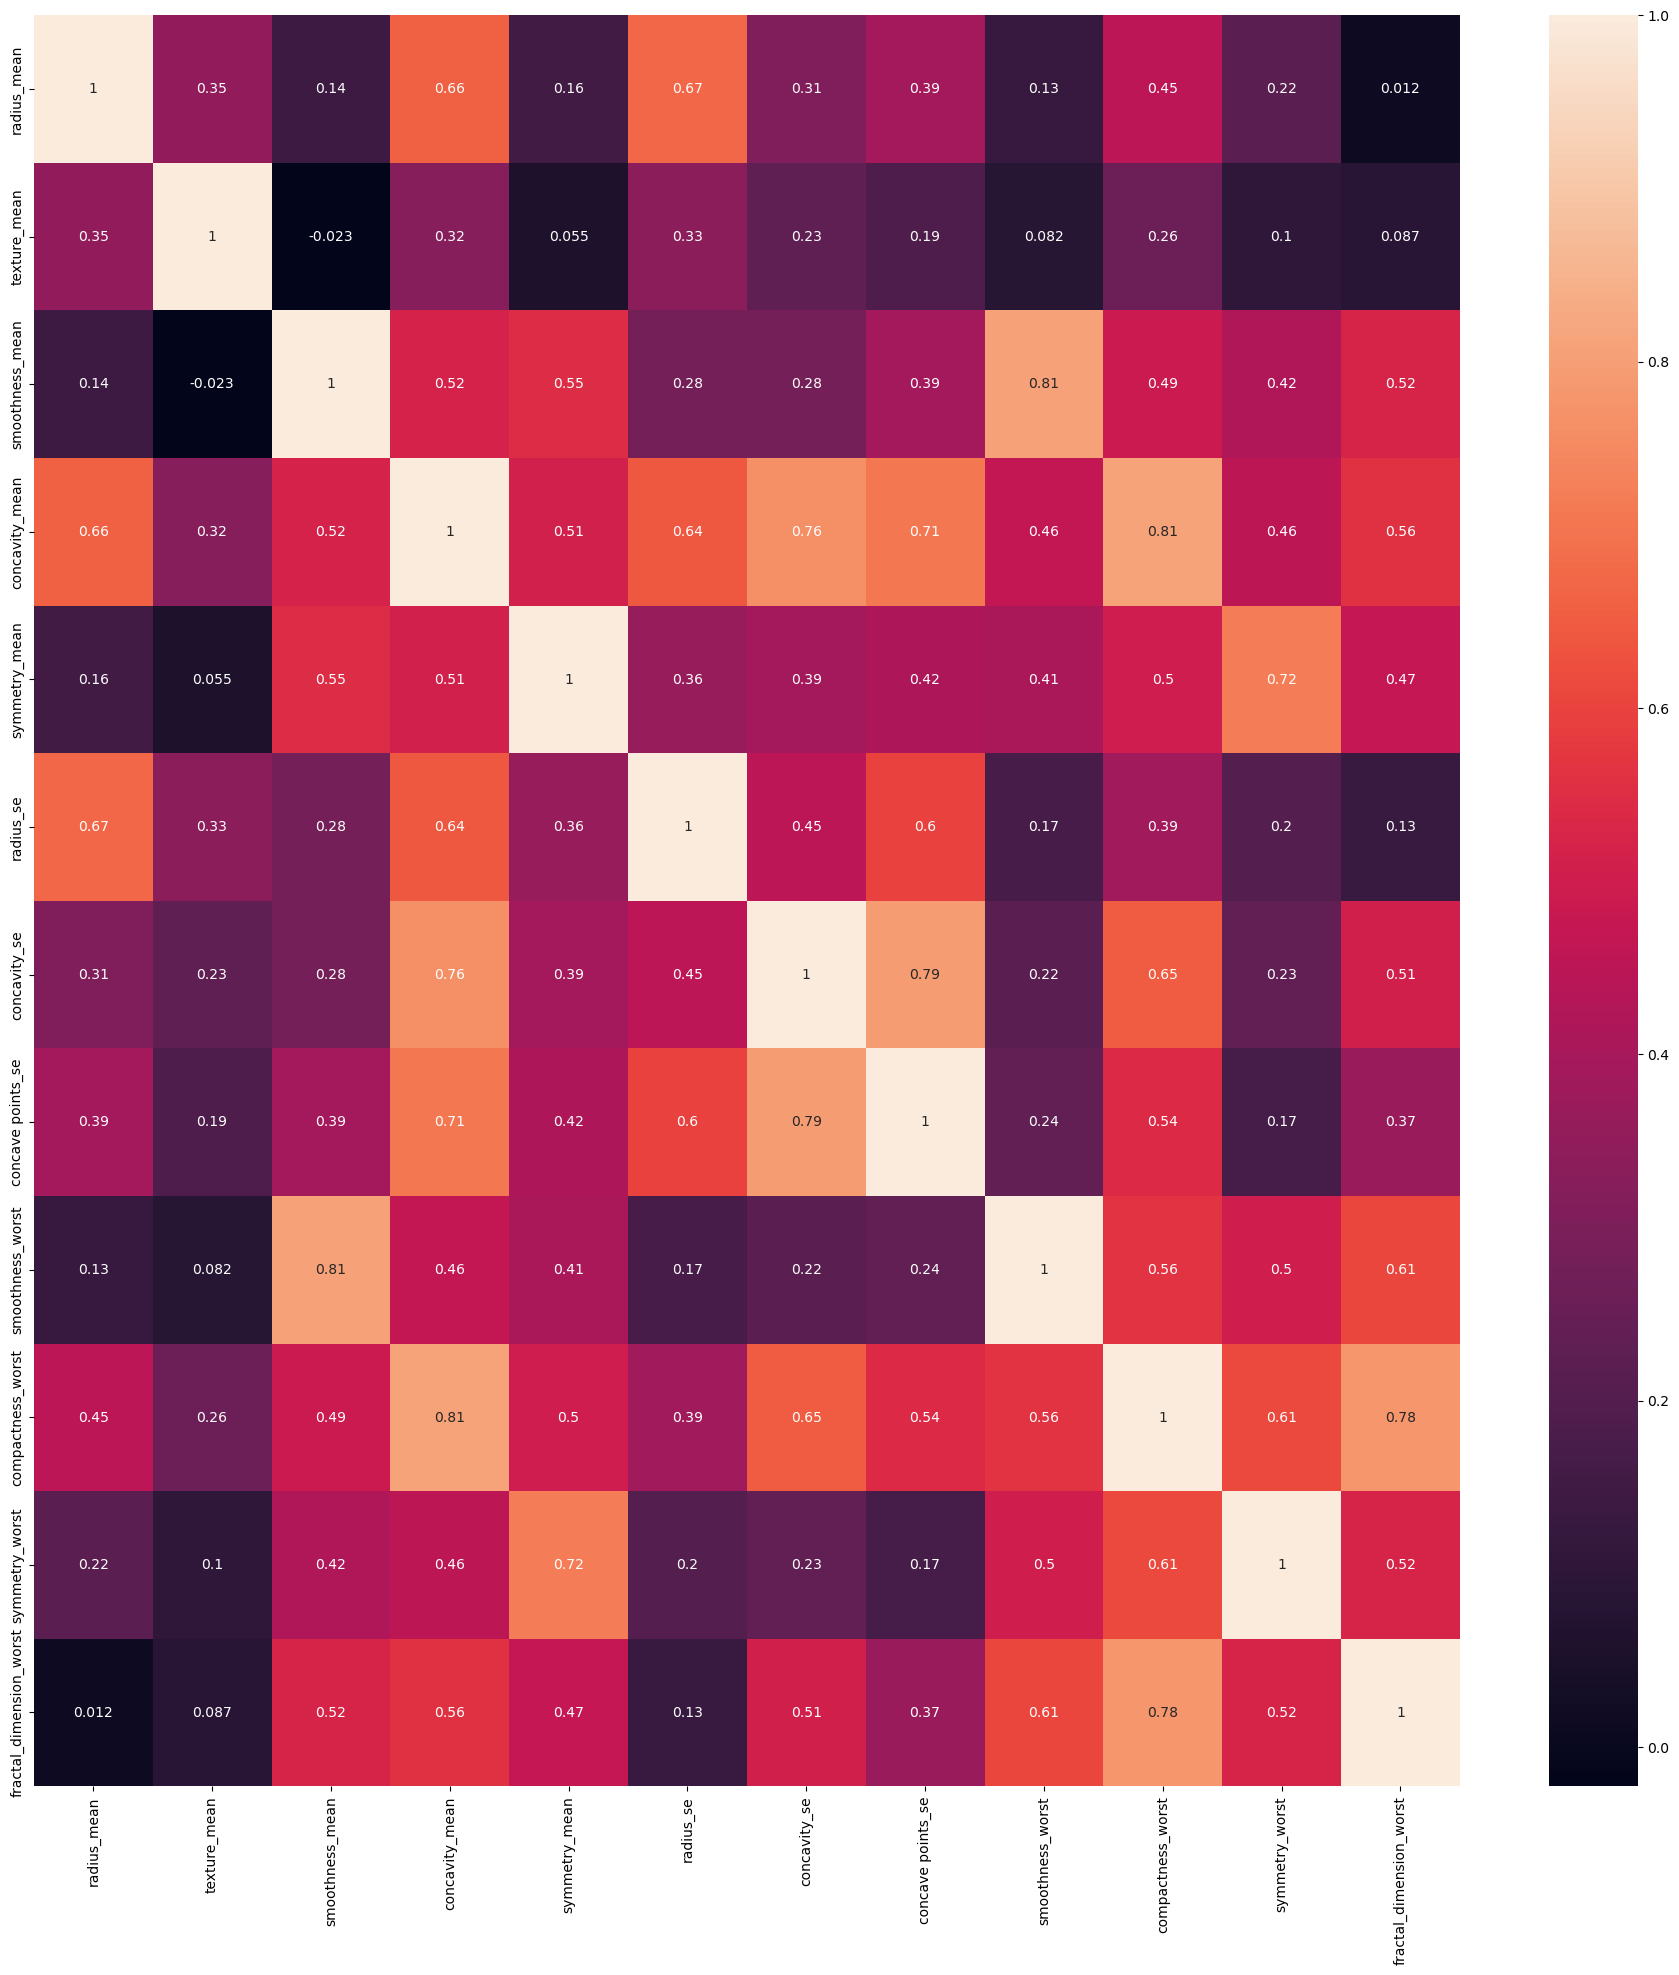

In [250]:
## getting rid of columns :-  [ 'concave points_mean' , 'compactness_mean' , 'concavity_worst' , 'concave points_worst' , 
#                               'perimeter_se', 'area_se' , 'texture_worst' , 'compactness_se']

features3 = ['radius_mean' ,'texture_mean' , 'smoothness_mean' ,  'concavity_mean' , 'symmetry_mean' , 'radius_se' , 
             'concavity_se', 'concave points_se' ,  'smoothness_worst', 'compactness_worst',  'symmetry_worst', 
             'fractal_dimension_worst']

# again checking for multicolinearity
plt.figure(figsize= (23,23))
sns.heatmap(train_df[features3].corr() , annot = True)

In [251]:
train_df.columns = train_df.columns.str.replace(' ' , '_')
test_df.columns = test_df.columns.str.replace(' ' , '_')

train_df['diagnosis'] = np.where(train_df['diagnosis'] == 'M' , 1 ,0)
test_df['diagnosis'] = np.where(test_df['diagnosis'] == 'M' , 1 ,0)


## Building the model

In [252]:
"+".join(features3)
formula1 = 'diagnosis ~ radius_mean+texture_mean+smoothness_mean+concavity_mean+radius_se+concavity_se+smoothness_worst+symmetry_worst'

In [253]:
model1 = smf.logit(formula1 , train_df).fit()


Optimization terminated successfully.
         Current function value: 0.080407
         Iterations 11


In [254]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      446
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.8785
Time:                        21:45:05   Log-Likelihood:                -36.585
converged:                       True   LL-Null:                       -301.20
Covariance Type:            nonrobust   LLR p-value:                3.741e-109
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -44.8465      8.098     -5.538      0.000     -60.718     -28.974
radius_mean          1.2904      0.242      5.336      0.000       0.816       1.764
texture_mean         0.4354      0.097      4.468      0.000       0.244       0.626
smoothness_mean    -94.5835     52.231     -1.811      0.070    -196.955       7.788
concavity_mean      67.2580     19.923      3.376      0.001      28.209     106.307
radius_se            9.7608      2.897      3.369      0.001       4.082      15.440
concavity_se      -146.9969     56.487     -2.602      0.009    -257.710     -36.284
smoothness_worst   121.4223     32.764      3.706      0.000      57.207     185.638
symmetry_worst      19.6355      7.043      2.788      0.005       5.831      33.440
====================================================================================

Possibly complete quasi-separation: A fraction 0.38 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

0.9953463470883781

In [256]:
roc_df = pd.DataFrame()
for cutoff in np.linspace(0,1,50):
    
    train_df['pred'] = np.where(model1.predict() > cutoff , 1 , 0 )
    TP = np.where(( train_df['pred'] == 1) & train_df.diagnosis == 1 , 1, 0)
    TN = np.where((train_df['pred'] == 0) & train_df.diagnosis == 0 , 1, 0)
    FP = np.where((train_df['pred'] == 1) & train_df.diagnosis == 0 , 1, 0)
    FN = np.where((train_df['pred'] == 0) & train_df.diagnosis == 1 , 1, 0)
    
    sensitivity = TP.sum() / (TP.sum()+ FN.sum())
    specificity = TN.sum() / (TN.sum()+ FP.sum())
    
    total = sensitivity + specificity
    
    temp_df = pd.DataFrame([cutoff , sensitivity , specificity , total]).T
    roc_df = pd.concat([roc_df , temp_df] , axis = 0)
roc_df.columns = ['cutoff' , 'sensitivity' , 'specificity' , 'total']

In [257]:
roc_df.sort_values(by = 'total' , ascending= False).iloc[1:6 ,:]

,cutoff,sensitivity,specificity,total
0,0.040816,0.994152,0.614344,1.608496
0,0.061224,0.994152,0.614344,1.608496
0,0.081633,0.994152,0.614344,1.608496
0,0.020408,0.994152,0.614344,1.608496
0,0.102041,0.988304,0.612991,1.601295


In [281]:
print( 'roc_auc_score  :' , roc_auc_score(train_df.diagnosis , model1.predict())  )
print( 'Accuracy Score :' , accuracy_score(train_df.diagnosis , train_df.pred))

roc_auc_score  : 0.9953463470883781
Accuracy Score : 0.9296703296703297


In [274]:
print(classification_report(train_df.diagnosis , train_df.pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       284
           1       0.85      0.99      0.91       171

    accuracy                           0.93       455
   macro avg       0.92      0.94      0.93       455
weighted avg       0.94      0.93      0.93       455



In [268]:
cutoff =  0.061224
train_df['pred'] = np.where(model1.predict() > 0.061224 , 1 , 0 ) 

In [269]:
# testing on test data

test_df['pred']  = np.where(model1.predict(test_df) > cutoff , 1 , 0 )

In [282]:
print( 'roc_auc_score  :' , roc_auc_score(test_df.diagnosis , model1.predict(test_df))  )
print( 'Accuracy Score :' , accuracy_score(test_df.diagnosis , test_df.pred))


roc_auc_score  : 0.9913130638155696
Accuracy Score : 0.956140350877193


In [273]:
print(classification_report(test_df.diagnosis , test_df.pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        73
           1       0.91      0.98      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

